In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.model_selection import learning_curve

In [2]:
crop_filepath = "Crop_recommendation.csv"
data = pd.read_csv(crop_filepath)

In [3]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)

In [4]:
features = data.drop("label", axis=1)
target = data.label

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [6]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=4, max_features=2, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.999
Test score: 0.984


In [7]:
grad = GradientBoostingClassifier().fit(X_train, y_train)
print("Training score: {:.3f}".format(grad.score(X_train, y_train)))
print("Test score: {:.3f}".format(grad.score(X_test, y_test)))



Training score: 1.000
Test score: 0.982


<AxesSubplot:>

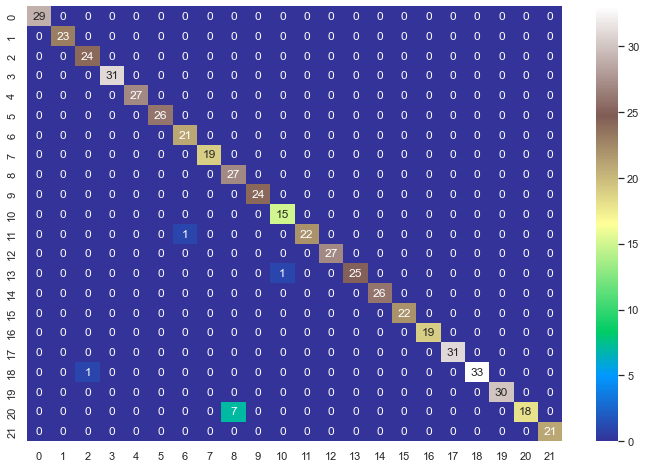

In [8]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,grad.predict(X_test))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(mat, annot=True, annot_kws={"size": 12},cmap="terrain")

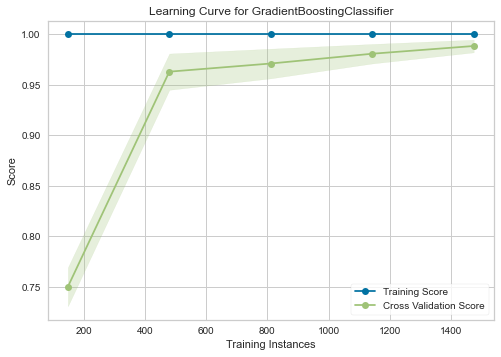

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>,
       cv=10,
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       exploit_incremental_learning=False, groups=None, n_jobs=1,
       pre_dispatch='all', random_state=None, scoring='accuracy',
       shuffle=False,
       train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))


In [13]:
#training
print(learning_curve(grad, X_train, y_train, cv=10, scoring='accuracy'))

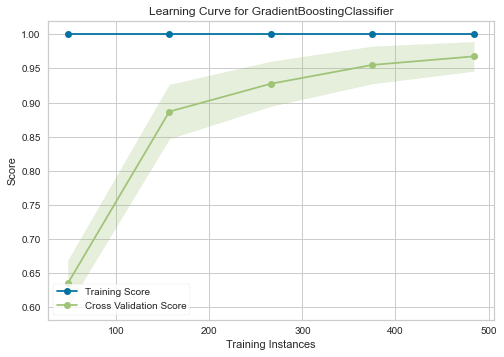

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>,
       cv=10,
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       exploit_incremental_learning=False, groups=None, n_jobs=1,
       pre_dispatch='all', random_state=None, scoring='accuracy',
       shuffle=False,
       train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))


In [12]:
#testing
print(learning_curve(gbr, X_test, y_test, cv=10, scoring='accuracy'))

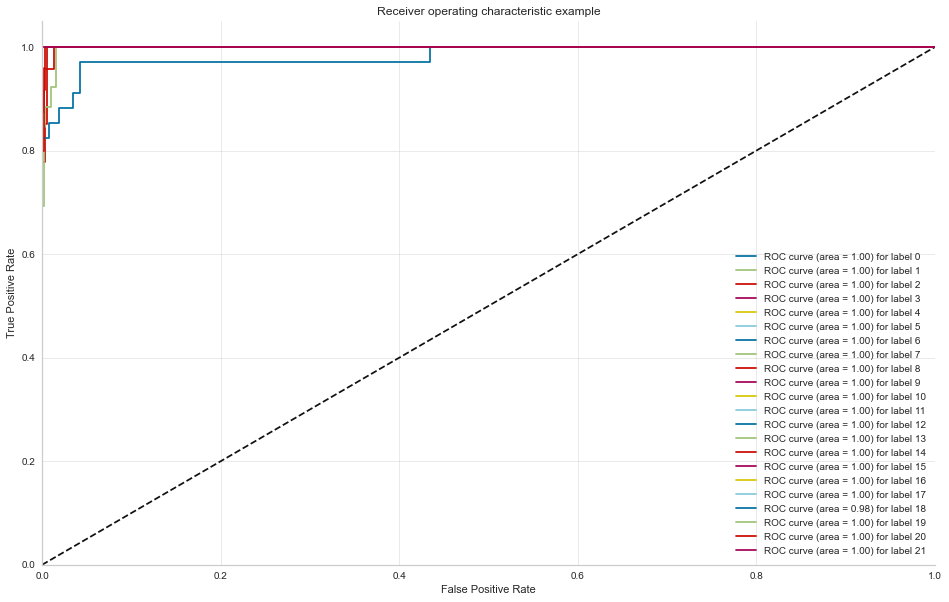

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(gbr, X_test, y_test, n_classes=22, figsize=(16, 10))